# Prediction using Decision Tree Algorithm

## By - Shanmukha Sai Ganesh Sripada

Dataset - Iris, Objective - Prediction using Decision Tree Algorithm

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [25]:
import sklearn.datasets as datasets
iris = datasets.load_iris()
dataset = pd.DataFrame(iris.data, columns=iris.feature_names)

In [27]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Dealing with missing data (if any)

In [30]:
dataset.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Visualizing data

## Splitting data into training and testing sets

In [34]:
X = dataset.iloc[:, 0:].values
y = iris.target

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
print(X_train)

[[5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.4 0.1]
 [7.1 3.  5.9 2.1]
 [6.9 3.2 5.7 2.3]
 [6.5 3.  5.8 2.2]
 [6.4 2.8 5.6 2.1]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [6.5 3.2 5.1 2. ]
 [6.7 3.3 5.7 2.1]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [4.9 3.  1.4 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 5.4 2.1]
 [4.4 3.2 1.3 0.2]
 [5.  3.6 1.

In [37]:
print(X_test)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]
 [6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]]


## Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
print(X_train)

[[-1.02366372 -2.37846268 -0.18295039 -0.29318114]
 [ 0.69517462 -0.10190314  0.93066067  0.7372463 ]
 [ 0.92435306  0.58106472  1.04202177  1.63887031]
 [ 0.1222285  -1.92315077  0.6522579   0.35083601]
 [ 0.92435306 -1.24018291  1.09770233  0.7372463 ]
 [-0.33612839 -1.24018291  0.03977182 -0.16437771]
 [ 2.07024529 -0.10190314  1.26474398  1.38126345]
 [ 0.46599617  0.58106472  0.48521625  0.47963944]
 [-0.45071761 -1.46783886 -0.01590873 -0.16437771]
 [ 0.46599617 -0.784871    0.59657735  0.7372463 ]
 [ 0.46599617 -0.55721505  0.70793846  0.35083601]
 [-1.13825295 -1.24018291  0.37385514  0.60844287]
 [ 0.46599617 -1.24018291  0.6522579   0.86604973]
 [ 1.26812073  0.35340877  0.48521625  0.22203258]
 [ 0.69517462 -0.10190314  0.76361901  0.99485316]
 [ 0.1222285   0.80872067  0.37385514  0.47963944]
 [-1.25284217  0.12575281 -1.24088089 -1.32360858]
 [-0.10694994 -0.784871    0.70793846  0.86604973]
 [-0.33612839 -0.784871    0.20681348  0.09322915]
 [-0.33612839 -0.32955909 -0.12

In [40]:
print(X_test)

[[-0.10694994 -0.55721505  0.70793846  1.51006688]
 [ 0.1222285  -1.92315077  0.09545238 -0.29318114]
 [-0.45071761  2.6299683  -1.35224199 -1.32360858]
 [ 1.6118884  -0.32955909  1.37610509  0.7372463 ]
 [-1.02366372  0.80872067 -1.29656144 -1.32360858]
 [ 0.46599617  0.58106472  1.20906343  1.63887031]
 [-1.02366372  1.03637663 -1.40792255 -1.19480515]
 [ 0.92435306  0.12575281  0.48521625  0.35083601]
 [ 1.03894229 -0.55721505  0.5408968   0.22203258]
 [ 0.23681773 -0.55721505  0.09545238  0.09322915]
 [ 0.23681773 -1.01252695  0.98634122  0.22203258]
 [ 0.5805854   0.35340877  0.37385514  0.35083601]
 [ 0.23681773 -0.55721505  0.48521625 -0.03557428]
 [ 0.69517462 -0.55721505  0.42953569  0.35083601]
 [ 0.23681773 -0.32955909  0.48521625  0.22203258]
 [-1.13825295  1.26403258 -1.35224199 -1.45241201]
 [ 0.1222285  -0.32955909  0.37385514  0.35083601]
 [-0.45071761 -1.01252695  0.31817459 -0.03557428]
 [-1.25284217 -0.10190314 -1.35224199 -1.19480515]
 [-0.56530683  1.94700044 -1.40

## Training a Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting Test set result

In [42]:
y_pred = classifier.predict(X_test)

# Compating the actual and predicted values
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)) 

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy Score:  0.9777777777777777


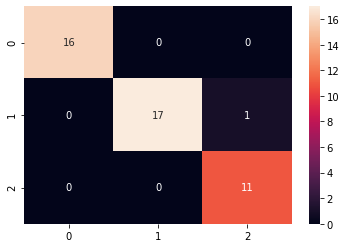

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
sns.heatmap(cm, annot=True)

This shows that our model is 97.77% accurate

## Visualizing Decision Tree

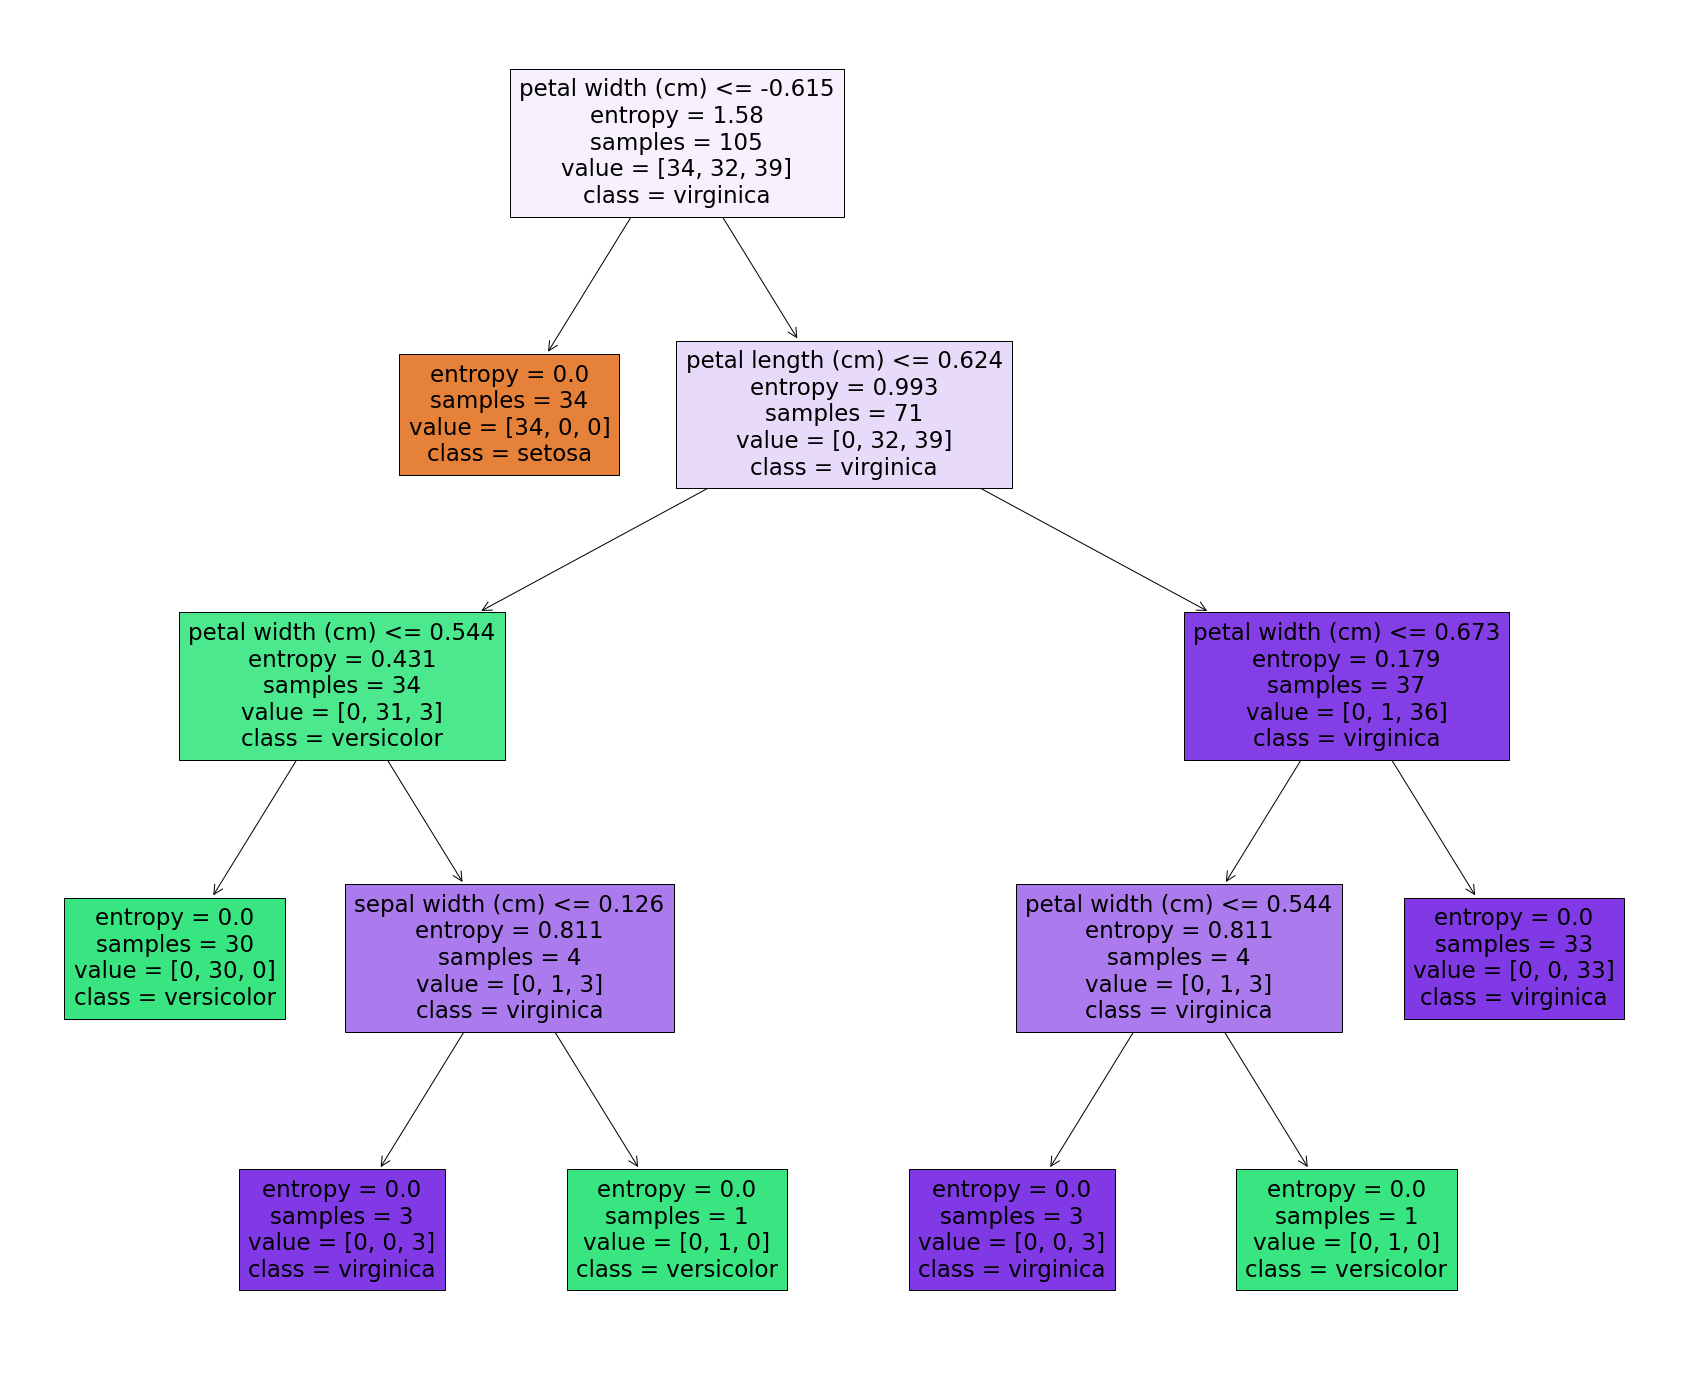

In [55]:
from sklearn import tree
plt.figure(figsize=(30,25))
tree_plot = tree.plot_tree(classifier, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)